# A Closed Form Solution for Pricing Options: The Black-Scholes Model

## Load the Libs we need

In [1]:
# import Lib
import pandas as pd
import datetime as dt
import pytz
import os
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import scipy.stats as si

# import module
from datetime import datetime, timezone
from datetime import date, time
from math import trunc
from dateutil.parser import parse


## Black-Scholes Pricing for Calls and Puts

In [2]:
# mb_black_scholes function needs the following variables:
# S: spot price
# K: strike price
# T: time to maturity
# r: interest rate
# v: volatility of underlying asset

def mb_black_scholes(S, K, T, r, v, option = 'call'):
    d1 = (np.log(S / K) + (r + 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return result

#### Let's price a call and a put

In [3]:
call_price = mb_black_scholes(175, 145, 1, 0.05, 0.35, option = 'call')
put_price = mb_black_scholes(175, 145, 1, 0.05, 0.35, option = 'put')

print(f"The Black-Scholes price of the call option is: {call_price}")
print(f"The Black-Scholes price of the put option is: {put_price}")

The Black-Scholes price of the call option is: 45.037061545347896
The Black-Scholes price of the put option is: 7.965328097951435


In [4]:
mb_src_prices = pd.read_csv("mb_tickerDf05192023 2023-05-21 11-06-44-380372.csv", index_col=0)
mb_src_options = pd.read_csv("mb_all_options_data05192023 2023-05-21 11-06-51-071892.csv", index_col=0)
mb_src_ir = pd.read_csv("mb_US_T_05192023 2023-05-21 11-06-56-696354.csv", index_col=0)

# Parsing the dates in the index and convert them to date only (without time or timezone info)
mb_src_prices.index = mb_src_prices.index.map(lambda x: parse(x).date())

#print(mb_src_prices)
print(mb_src_options)
#print(mb_src_ir)

           contractSymbol              lastTradeDate  strike  lastPrice  \
0     AAPL230526C00095000  2023-05-19 19:36:18+00:00    95.0      80.27   
1     AAPL230526C00100000  2023-05-17 13:59:34+00:00   100.0      75.32   
2     AAPL230526C00110000  2023-05-16 18:17:19+00:00   110.0      62.18   
3     AAPL230526C00115000  2023-05-08 15:00:05+00:00   115.0      58.70   
4     AAPL230526C00120000  2023-05-17 19:25:47+00:00   120.0      52.52   
...                   ...                        ...     ...        ...   
1628  AAPL251219P00260000  2023-05-15 18:24:01+00:00   260.0      86.91   
1629  AAPL251219P00270000  2023-05-05 14:01:40+00:00   270.0      96.76   
1630  AAPL251219P00290000  2023-05-11 17:03:36+00:00   290.0     116.36   
1631  AAPL251219P00300000  2023-04-19 13:31:50+00:00   300.0     134.00   
1632  AAPL251219P00310000  2023-05-15 18:24:01+00:00   310.0     139.21   

         bid     ask    change  percentChange  volume  openInterest  \
0      78.95   81.45  1.2699

In [5]:
strike_target = 145
expiration_target = 396

row_target = mb_src_options.loc[(mb_src_options['strike'] == strike_target) & 
                                (mb_src_options['time_to_expiration'] == expiration_target)]

print(row_target)


           contractSymbol              lastTradeDate  strike  lastPrice  \
1094  AAPL240621C00145000  2023-05-19 19:56:33+00:00   145.0      42.70   
1146  AAPL240621P00145000  2023-05-19 15:15:17+00:00   145.0       6.53   

        bid   ask    change  percentChange  volume  openInterest  \
1094  43.20  44.2 -0.099998      -0.233641     1.0          3485   
1146   6.15   7.0 -0.290000      -4.252199   216.0          8781   

      impliedVolatility  inTheMoney contractSize currency OptionType  \
1094           0.400214        True      REGULAR      USD       Call   
1146           0.275550       False      REGULAR      USD        Put   

     expirationDate  time_to_expiration  
1094     2024-06-21                 396  
1146     2024-06-21                 396  


#### Spot Ladder

In [6]:
# SPOT LADDER

# Define parameters
K = 200
T = 1
r = 0.05
v = 0.35

# Define range for spot price
S_range = np.arange(100, 310, 10)

# Calculate call and put prices for each spot price
call_prices = [mb_black_scholes(S, K, T, r, v, option = 'call') for S in S_range]
put_prices = [mb_black_scholes(S, K, T, r, v, option = 'put') for S in S_range]

# Create DataFrame
df = pd.DataFrame({
    'Spot Price': S_range,
    'Call Price': call_prices,
    'Put Price': put_prices
})

print(df)

    Spot Price  Call Price  Put Price
0          100    0.619309  90.865194
1          110    1.262418  81.508303
2          120    2.299140  72.545025
3          130    3.829395  64.075279
4          140    5.935591  56.181476
5          150    8.676300  48.922185
6          160   12.084155  42.330040
7          170   16.167140  36.413025
8          180   20.912077  31.157962
9          190   26.289185  26.535070
10         200   32.256858  22.502743
11         210   38.766076  19.011961
12         220   45.764142  16.010027
13         230   53.197635  13.443520
14         240   61.014579  11.260464
15         250   69.165935   9.411820
16         260   77.606516   7.852401
17         270   86.295460   6.541344
18         280   95.196376   5.442261
19         290  104.277257   4.523142
20         300  113.510242   3.756127


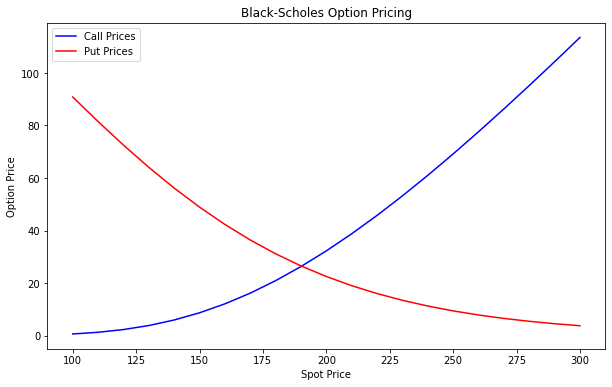

In [7]:
# Set plot size and title
plt.figure(figsize=(10, 6))
plt.title('Black-Scholes Option Pricing')

# Plot call and put prices
plt.plot(df['Spot Price'], df['Call Price'], label='Call Prices', color='blue')
plt.plot(df['Spot Price'], df['Put Price'], label='Put Prices', color='red')

# Set labels and legend
plt.xlabel('Spot Price')
plt.ylabel('Option Price')
plt.legend()

# Display plot
plt.show()


## Decoding the Greeks

###### First, let's use the analytical approach, based on the closed-form solution of the Black-Scholes model. 
###### These are the Python functions to calculate the Greeks:

In [8]:
def mb_bs_delta(S, K, T, r, v, option='call'):
    d1 = (np.log(S / K) + (r + 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    if option == 'call':
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif option == 'put':
        delta = si.norm.cdf(d1, 0.0, 1.0) - 1
    return delta

def mb_bs_gamma(S, K, T, r, v):
    d1 = (np.log(S / K) + (r + 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    gamma = si.norm.pdf(d1, 0.0, 1.0) / (S * v * np.sqrt(T))
    return gamma

def mb_bs_theta(S, K, T, r, v, option='call'):
    d1 = (np.log(S / K) + (r + 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    if option == 'call':
        theta = -(S * si.norm.pdf(d1, 0.0, 1.0) * v / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif option == 'put':
        theta = -(S * si.norm.pdf(d1, 0.0, 1.0) * v / (2 * np.sqrt(T))) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    return theta

def mb_bs_vega(S, K, T, r, v):
    d1 = (np.log(S / K) + (r + 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    vega = S * si.norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)
    return vega

def mb_bs_rho(S, K, T, r, v, option='call'):
    d2 = (np.log(S / K) + (r - 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    if option == 'call':
        rho = K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif option == 'put':
        rho = -K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    return rho


###### For the numerical approach, we use the concept of finite differences. 
###### Here, the Greeks are approximated by perturbing each parameter slightly and seeing how much the option price changes:

In [9]:
def mb_numerical_delta(S, K, T, r, v, option='call'):
    dS = 0.01 * S
    option_plus = mb_black_scholes(S + dS, K, T, r, v, option)
    option_minus = mb_black_scholes(S - dS, K, T, r, v, option)
    delta = (option_plus - option_minus) / (2 * dS)
    return delta

def mb_numerical_gamma(S, K, T, r, v):
    dS = 0.01 * S
    delta_plus = mb_numerical_delta(S + dS, K, T, r, v)
    delta_minus = mb_numerical_delta(S - dS, K, T, r, v)
    gamma = (delta_plus - delta_minus) / (2 * dS)
    return gamma

def mb_numerical_vega(S, K, T, r, v):
    dv = 0.01 * v
    option_plus = mb_black_scholes(S, K, T, r, v + dv)
    option_minus = mb_black_scholes(S, K, T, r, v - dv)
    vega = (option_plus - option_minus) / (2 * dv)
    return vega

def mb_numerical_theta(S, K, T, r, v, option='call'):
    dT = 0.01 * T
    option_plus = mb_black_scholes(S, K, T + dT, r, v, option)
    option_minus = mb_black_scholes(S, K, T - dT, r, v, option)
    theta = (option_minus - option_plus) / dT  # time decay, theta is negative
    return theta

def mb_numerical_rho(S, K, T, r, v, option='call'):
    dr = 0.01 * r
    option_plus = mb_black_scholes(S, K, T, r + dr, v, option)
    option_minus = mb_black_scholes(S, K, T, r - dr, v, option)
    rho = (option_plus - option_minus) / (2 * dr)
    return rho



###### Greeks functions test

In [10]:
# delta
calladelta = mb_bs_delta(175, 145, 1, 0.05, 0.35, option = 'call')
callndelta = mb_numerical_delta(175, 145, 1, 0.05, 0.35, option = 'call')
putadelta = mb_bs_delta(175, 145, 1, 0.05, 0.35, option = 'put')
putndelta = mb_numerical_delta(175, 145, 1, 0.05, 0.35, option = 'put')
print(f"The analytical delta for a call is: {calladelta}")
print(f"The numerical for a call is: {callndelta}")
print(f"The analytical delta for a put is: {putadelta}")
print(f"The numerical for a put is: {putndelta}")
# Gamma
agamma = mb_bs_gamma(175, 145, 1, 0.05, 0.35)
ngamma = mb_numerical_gamma(175, 145, 1, 0.05, 0.35)
print(f"The analytical gamma is: {agamma}")
print(f"The numerical gamma is: {ngamma}")
# Vega
avega = mb_bs_vega(175, 145, 1, 0.05, 0.35)
nvega = mb_numerical_vega(175, 145, 1, 0.05, 0.35)
print(f"The analytical vega is: {avega}")
print(f"The numerical vega is: {nvega}")
# Theta
callatheta = mb_bs_theta(175, 145, 1, 0.05, 0.35, option = 'call')
callntheta = mb_numerical_theta(175, 145, 1, 0.05, 0.35, option = 'call')
putatheta = mb_bs_theta(175, 145, 1, 0.05, 0.35, option = 'put')
putntheta = mb_numerical_theta(175, 145, 1, 0.05, 0.35, option = 'put')
print(f"The analytical theta for a call is: {callatheta}")
print(f"The numerical for a call is: {callntheta}")
print(f"The analytical theta for a put is: {putatheta}")
print(f"The numerical for a put is: {putntheta}")
# Rho
callarho = mb_bs_rho(175, 145, 1, 0.05, 0.35, option = 'call')
callnrho = mb_numerical_rho(175, 145, 1, 0.05, 0.35, option = 'call')
putarho = mb_bs_rho(175, 145, 1, 0.05, 0.35, option = 'put')
putnrho = mb_numerical_rho(175, 145, 1, 0.05, 0.35, option = 'put')
print(f"The analytical rho for a call is: {callarho}")
print(f"The numerical for a call is: {callnrho}")
print(f"The analytical rho for a put is: {putarho}")
print(f"The numerical for a put is: {putnrho}")

The analytical delta for a call is: 0.8037657315199467
The numerical for a call is: 0.8037203528286747
The analytical delta for a put is: -0.19623426848005332
The numerical for a put is: -0.19627964717132937
The analytical gamma is: 0.004518647805975139
The numerical gamma is: 0.004519203443039656
The analytical vega is: 48.43425617029602
The numerical vega is: 48.43326173641824
The analytical theta for a call is: -13.25709190333394
The numerical for a call is: -26.51432269294247
The analytical theta for a put is: -6.360678575703764
The numerical for a put is: -12.721495462977828
The analytical rho for a call is: 95.62194147064277
The numerical for a call is: 95.62192560100868
The analytical rho for a put is: -42.30632508196078
The numerical for a put is: -42.30634669863775
